In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.dataloader import DataLoader
import pandas as pd

In [3]:
dataloader = DataLoader()
df = dataloader.read_data('../data', 'AdSmartABdata.csv')

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


### Divide the dataset in to control and exposed groups

In [5]:
control_df = df[df["experiment"] == "control"]
exposed_df = df[df["experiment"] == "exposed"]

In [6]:
control_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0


In [7]:
exposed_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


### Select all users that reacted to yes/no

In [8]:
yes_users_control = control_df[control_df["yes"]== 1]
yes_users_exposed = exposed_df[exposed_df["yes"]== 1]
no_users_control = control_df[control_df["no"]== 1]
no_users_exposed = exposed_df[exposed_df["no"]== 1]

In [9]:
#Drop yes, and no columns
yes_users_control = yes_users_control.drop(['yes','no'], axis = 1)
yes_users_exposed = yes_users_exposed.drop(['yes','no'], axis = 1)
no_users_control = no_users_control.drop(['yes','no'], axis = 1)
no_users_exposed = no_users_exposed.drop(['yes','no'], axis = 1)
#Add a reaction column
yes_users_control["reaction"] = 1
yes_users_exposed["reaction"] = 1
no_users_control["reaction"] = 0
no_users_exposed["reaction"] = 0

In [10]:
merged_control = pd.concat([yes_users_control, no_users_control])
merged_exposed = pd.concat([yes_users_exposed, no_users_exposed])
merged_df = pd.concat([merged_control, merged_exposed])

In [11]:
yes_users_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [12]:
yes_users_exposed.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


In [13]:
merged_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [14]:
no_users_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
48,01985992-d70b-4258-a3a1-60ac5e17bce6,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
62,023458f7-122d-475f-9525-1b9a3cc7a033,control,2020-07-03,15,MRD-LX1,6,Facebook,0
99,0332792f-0de9-4902-9d08-06033c3d8371,control,2020-07-06,2,Samsung SM-J600FN,6,Chrome Mobile WebView,0
101,0336ce2b-c5cb-454a-b74f-450232223742,control,2020-07-03,15,Samsung SM-A105FN,6,Samsung Internet,0


In [15]:
merged_exposed.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


### Shuffle rows

In [16]:
merged_exposed = merged_exposed.sample(frac=1).reset_index(drop=True)
merged_control = merged_control.sample(frac=1).reset_index(drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

In [17]:
merged_df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
0,4796d66c-1849-4a31-bb38-75b0d41d566c,exposed,2020-07-06,9,Generic Smartphone,6,Chrome Mobile,0
1,3413350e-0885-4d5f-b40e-7bc05a9c3ec1,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0
2,22d8d49e-4dbc-446a-b168-09251d377d12,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
3,b7cc440c-0bcc-415d-a312-b5385ffa4583,exposed,2020-07-09,10,Generic Smartphone,6,Chrome Mobile,0
4,83e913ff-69cf-4a38-b22b-81bc7d6c8976,exposed,2020-07-08,22,Samsung SM-G980F,6,Facebook,0
5,8f20687c-c07f-4053-bd1e-835b8757d512,control,2020-07-09,13,Samsung SM-G986B,6,Chrome Mobile WebView,0
6,bc31e71b-9e4b-4212-a9b4-9e637093c86e,exposed,2020-07-08,16,Generic Smartphone,6,Chrome Mobile,1
7,d679959d-5f76-42a6-9f82-25b7f1913c51,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,1
8,a98ffc07-6388-48ec-b8dd-1d9f77fd07d3,exposed,2020-07-09,22,Samsung SM-A600FN,6,Chrome Mobile WebView,1
9,c0cd6b96-dfd3-4ccc-bbeb-435330a05dc2,exposed,2020-07-03,12,OnePlus ONEPLUS A6013,6,Chrome Mobile WebView,1


In [18]:
merged_exposed.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
0,981812f8-45ec-49ae-86a8-327fce9f3db0,exposed,2020-07-07,17,Samsung SM-A515F,6,Chrome Mobile WebView,0
1,bc2e2abf-50d9-4c83-898c-405f60c2924c,exposed,2020-07-10,0,Samsung SM-A202F,6,Chrome Mobile WebView,1
2,b21528ce-584a-4221-9922-5c18182a9635,exposed,2020-07-07,12,Generic Smartphone,6,Chrome Mobile,0
3,d97c5289-6836-426d-a402-6aac1fec97a9,exposed,2020-07-03,13,OnePlus ONEPLUS A3000,6,Chrome Mobile WebView,1
4,188bb5f4-f591-47ff-aaec-3756b0ce2ea5,exposed,2020-07-09,6,I3312,6,Chrome Mobile WebView,0


In [19]:
merged_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
0,4c47394c-fd7f-4a7e-aff9-8014893702ee,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
1,7e10fa95-9b61-43fb-9bfc-99e5b83a54e5,control,2020-07-03,15,Samsung SM-J600FN,6,Samsung Internet,0
2,52b30299-274d-4602-8e85-e1714fc6c9f6,control,2020-07-09,7,Samsung SM-J320FN,6,Facebook,0
3,186ef415-5e35-4831-8459-320402da16a3,control,2020-07-03,15,Samsung SM-J330FN,6,Samsung Internet,1
4,10057c8e-c2c4-4e8b-83ce-3fed95b0531c,control,2020-07-05,15,Generic Smartphone,6,Chrome Mobile,0


### Label Encoding

In [20]:
from sklearn import preprocessing
def label_encoder(df):
    date_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    expt_encoder = preprocessing.LabelEncoder()
    browse_encoder = preprocessing.LabelEncoder()
    df["date"] = date_encoder.fit_transform(df["date"])
    df["experiment"] = expt_encoder.fit_transform(df["experiment"])
    df["device_make"] = device_encoder.fit_transform(df["device_make"])
    df["browser"] = browse_encoder.fit_transform(df["browser"])
    return df

In [21]:
merged_encoded = label_encoder(merged_df)

In [22]:
merged_encoded.tail(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
1233,fb5be6ce-25eb-4cc5-8f7a-837f6b0ffc69,0,0,15,13,6,1,1
1234,8800e2cd-984d-4072-a6eb-1fbb597750be,1,5,5,114,5,5,0
1235,f9c4603c-5ccf-4470-8e63-d1edc6fe87b2,0,4,1,13,6,1,0
1236,5b2472a3-a8b2-49ce-bd22-fbd2caddb70f,0,5,14,13,6,1,0
1237,52b30299-274d-4602-8e85-e1714fc6c9f6,0,6,7,79,6,4,0
1238,4ebdf633-b593-4ea7-ba5e-b185d3044a8d,1,6,10,65,6,4,0
1239,8b59d2aa-52bf-4816-b60c-a92b187a6e5b,0,0,15,46,6,7,0
1240,06cf1733-06d1-4c7c-a429-2312177166a2,1,6,20,66,6,7,0
1241,0c6da1d9-28fe-4cd7-8027-cebb466b611a,1,7,16,13,6,1,0
1242,e59dad8a-9176-4a11-b7c5-eab06104a848,0,0,15,13,6,1,0


### Split data by browser and platform_os

In [23]:
def split_data(df):
    browser_cols = ["auction_id","experiment","date","hour","device_make","browser","reaction"]
    platform_cols = ["auction_id","experiment", "date","hour","device_make","platform_os","reaction"]
    df_browser = df[browser_cols]
    df_platform = df[platform_cols]
    return df_browser, df_platform

In [24]:
browser_df, platform_df = split_data(merged_encoded)

In [25]:
browser_df.head()

,auction_id,experiment,date,hour,device_make,browser,reaction
0,4796d66c-1849-4a31-bb38-75b0d41d566c,1,3,9,13,1,0
1,3413350e-0885-4d5f-b40e-7bc05a9c3ec1,0,0,15,54,4,0
2,22d8d49e-4dbc-446a-b168-09251d377d12,0,0,15,13,1,0
3,b7cc440c-0bcc-415d-a312-b5385ffa4583,1,6,10,13,1,0
4,83e913ff-69cf-4a38-b22b-81bc7d6c8976,1,5,22,75,4,0


In [26]:
platform_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,reaction
0,4796d66c-1849-4a31-bb38-75b0d41d566c,1,3,9,13,6,0
1,3413350e-0885-4d5f-b40e-7bc05a9c3ec1,0,0,15,54,6,0
2,22d8d49e-4dbc-446a-b168-09251d377d12,0,0,15,13,6,0
3,b7cc440c-0bcc-415d-a312-b5385ffa4583,1,6,10,13,6,0
4,83e913ff-69cf-4a38-b22b-81bc7d6c8976,1,5,22,75,6,0


### Modeling

#### Logistic regression

In [27]:
from scripts.loggistic_train import logistic_regression

### Train using browser data

Feature: 0, Score: 0.05513
Feature: 1, Score: -0.01631
Feature: 2, Score: 0.01585
Feature: 3, Score: 0.00198
Feature: 4, Score: -0.02243


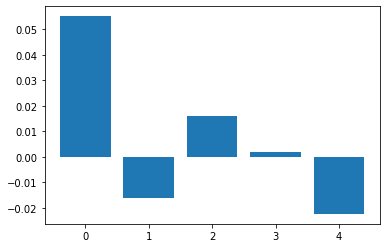

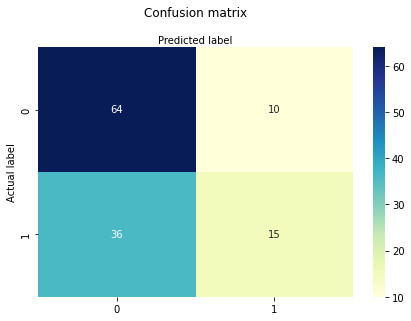

              precision    recall  f1-score   support

         Yes       0.64      0.86      0.74        74
          No       0.60      0.29      0.39        51

    accuracy                           0.63       125
   macro avg       0.62      0.58      0.57       125
weighted avg       0.62      0.63      0.60       125



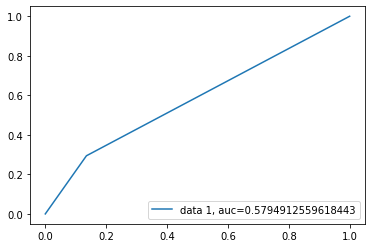

Model saved in run d4cb5546e2e448bdba534542069bbc51


/home/hmicheal/.conda/envs/10x/lib/python3.10/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [28]:
logistic_regression(browser_df)

### Train Using Platform data

Feature: 0, Score: 0.16959
Feature: 1, Score: 0.00600
Feature: 2, Score: 0.01798
Feature: 3, Score: 0.00285
Feature: 4, Score: 0.77655


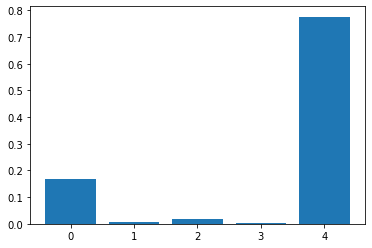

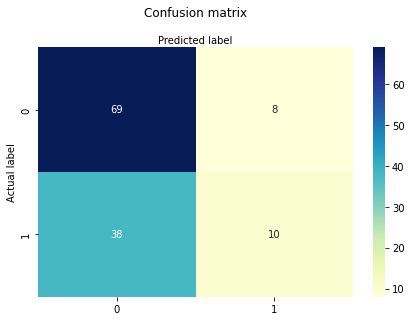

              precision    recall  f1-score   support

         Yes       0.64      0.90      0.75        77
          No       0.56      0.21      0.30        48

    accuracy                           0.63       125
   macro avg       0.60      0.55      0.53       125
weighted avg       0.61      0.63      0.58       125



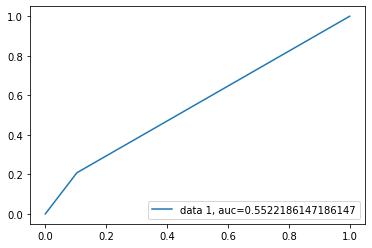

Model saved in run d4cb5546e2e448bdba534542069bbc51


In [29]:
logistic_regression(platform_df)

### Random Forest

In [30]:
from scripts.randomforest_train import randomforest_train

### Train using browser data

Feature: 0, Score: 0.08219
Feature: 1, Score: 0.22377
Feature: 2, Score: 0.34778
Feature: 3, Score: 0.25012
Feature: 4, Score: 0.09613


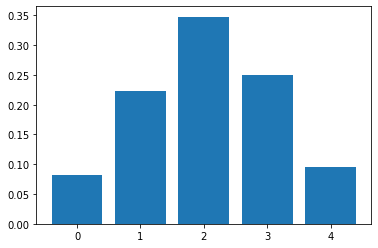

Model saved in run d4cb5546e2e448bdba534542069bbc51


In [31]:
randomforest_train(browser_df)

### Train using platform data

Feature: 0, Score: 0.08086
Feature: 1, Score: 0.23599
Feature: 2, Score: 0.36694
Feature: 3, Score: 0.31552
Feature: 4, Score: 0.00069


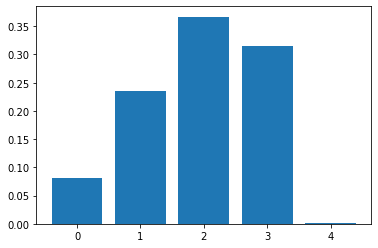

Model saved in run d4cb5546e2e448bdba534542069bbc51


In [32]:
randomforest_train(platform_df)

### XGboost

### Train using browser data

In [33]:
from scripts.xgboost_train import xgboost_train

Feature: 0, Score: 0.05872
Feature: 1, Score: 0.14606
Feature: 2, Score: 0.31081
Feature: 3, Score: 0.41161
Feature: 4, Score: 0.07279


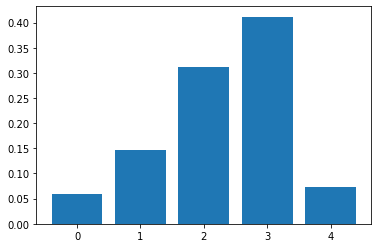

Model saved in run d4cb5546e2e448bdba534542069bbc51


In [34]:
xgboost_train(browser_df)

### Train Using Platform data

Feature: 0, Score: 0.03871
Feature: 1, Score: 0.14786
Feature: 2, Score: 0.30238
Feature: 3, Score: 0.50941
Feature: 4, Score: 0.00165


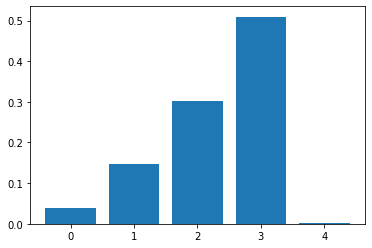

Model saved in run d4cb5546e2e448bdba534542069bbc51


In [35]:
xgboost_train(platform_df)